In [3]:
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve
from matplotlib import pyplot as plt

In [4]:
cancer = load_breast_cancer()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=42)

In [7]:
lr_clf = LogisticRegression(max_iter=4000).fit(X_train, y_train)
nb_clf = GaussianNB().fit(X_train, y_train)

In [8]:
# Get the prediction probabilities
lr_y_pred_prob = lr_clf.predict_proba(X_test)[:,1]
nb_y_pred_prob = nb_clf.predict_proba(X_test)[:,1]

In [9]:
lr_fpr, lr_tpr, lr_thershold = roc_curve(y_test, lr_y_pred_prob, pos_label=1)
nb_fpr, nb_tpr, nb_thershold = roc_curve(y_test, nb_y_pred_prob, pos_label=1)

In [10]:
# Calculate the AUC score
lr_score = round(auc(lr_fpr, lr_tpr) * 100, 2)
nb_score = round(auc(nb_fpr, nb_tpr) * 100, 2)
print(lr_score, nb_score)

99.56 98.93


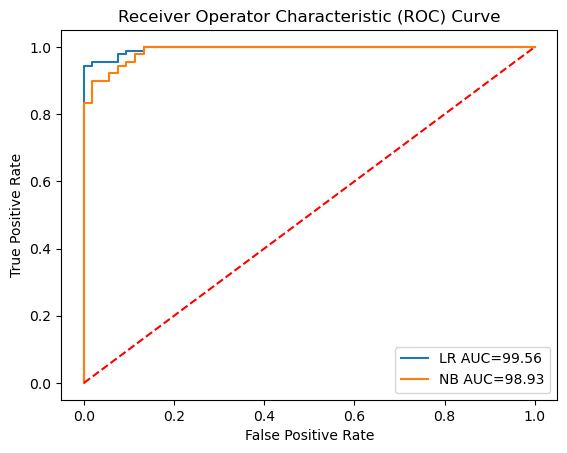

In [11]:
plt.plot(lr_fpr, lr_tpr, label='LR AUC=%0.2f' % lr_score)
plt.plot(nb_fpr, nb_tpr, label='NB AUC=%0.2f' % nb_score)

plt.plot([0,1],[0,1], 'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operator Characteristic (ROC) Curve')

plt.legend(loc='lower right')
plt.show()